# 1. Business Understanding

## Problem Statements

## Goals

## Solution Statements

# Data Understanding

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import randint
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import joblib

## Load Dataset

In [2]:
# Load dataset bmi
bmi_df = pd.read_csv('bmi_dataset.csv')

# Tampilkan beberapa contoh data bmi
print("\nContoh data bmi:")
print(bmi_df.head())


Contoh data bmi:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1  100  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level 

In [3]:
# Load dataset nutrisi
nutri_df = pd.read_csv('dataset_nutrients.csv')

# Tampilkan beberapa contoh data nutrisi
print("\nContoh data nutrisi:")
print(nutri_df.head())


Contoh data nutrisi:
   index                                          image  carbs   fat  fibre  \
0      1    recipe-image-legacy-id-46013_11-99b8eda.jpg   30.0  11.0    2.0   
1      2   recipe-image-legacy-id-743466_11-e87df17.jpg   38.0   7.0    2.0   
2      3  recipe-image-legacy-id-1119465_11-4aebb21.jpg   22.0  17.0    1.0   
3      4  recipe-image-legacy-id-1201816_10-7f0a38f.jpg   32.0   9.0    2.0   
4      9  recipe-image-legacy-id-1025484_11-f56ab42.jpg   25.0  11.0    1.0   

    kcal  protein  salt  saturates  sugars  
0  275.0     17.0  1.99        6.0     4.0  
1  240.0      8.0  1.37        2.0     1.0  
2  294.0     13.0  1.50        9.0     1.0  
3  250.0     12.0  1.00        5.0     3.0  
4  218.0      6.0  0.60        6.0     1.0  


In [4]:
# Rename kolom bmi dataset agar seragam
bmi_df.rename(columns={
    'Weight (kg)': 'WeightKg',
    'Height (m)': 'HeightM'
}, inplace=True)

# Tambahkan kolom WH_Ratio (pengganti BMI)
bmi_df['WH_Ratio'] = bmi_df['WeightKg'] / (bmi_df['HeightM'] ** 2)

## Characteristic Dataset

In [5]:
print("\nInformasi Struktur Dataset BMI:")
print(bmi_df.info())

print("\nInformasi Struktur Dataset Nutrisi:")
print(nutri_df.info())


Informasi Struktur Dataset BMI:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            3000 non-null   int64  
 1   Gender                         3000 non-null   object 
 2   WeightKg                       3000 non-null   float64
 3   HeightM                        3000 non-null   float64
 4   Max_BPM                        3000 non-null   int64  
 5   Avg_BPM                        3000 non-null   int64  
 6   Resting_BPM                    3000 non-null   int64  
 7   Session_Duration (hours)       3000 non-null   float64
 8   Calories_Burned                3000 non-null   float64
 9   Workout_Type                   3000 non-null   object 
 10  Fat_Percentage                 3000 non-null   float64
 11  Water_Intake (liters)          3000 non-null   float64
 12  Workout_Frequen

### Summary Statistics

In [6]:
print("\nStatistik Ringkasan Dataset BMI:")
print(bmi_df.describe())

print("\nStatistik Ringkasan Dataset Nutrisi:")
print(nutri_df.describe())


Statistik Ringkasan Dataset BMI:
               Age     WeightKg      HeightM      Max_BPM      Avg_BPM  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean     37.970000    81.821667     1.751490   179.591000   144.409333   
std      13.921603    27.815375     0.177633    11.590823    14.472673   
min       5.000000    20.000000     1.200000   160.000000   120.000000   
25%      27.000000    59.700000     1.620000   170.000000   132.000000   
50%      38.000000    78.900000     1.740000   180.000000   144.000000   
75%      49.000000   103.500000     1.870000   190.000000   157.000000   
max     100.000000   200.000000     3.000000   199.000000   169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count  3000.000000               3000.000000      3000.000000     3000.000000   
mean     61.979667                  1.249347       997.729867       23.354500   
std       7.250525                  0.405450       381.5

### Attribute Information

## Check Data Type

In [7]:
print("\nTipe Data Dataset BMI:")
print(bmi_df.dtypes)

print("\nTipe Data Dataset Nutrisi:")
print(nutri_df.dtypes)


Tipe Data Dataset BMI:
Age                                int64
Gender                            object
WeightKg                         float64
HeightM                          float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
PAL                              float64
PAL_kategori                      object
WH_Ratio                         float64
dtype: object

Tipe Data Dataset Nutrisi:
index          int64
image         object
carbs        float64
fat          float64
fibre        float64
kcal         float64
protein      float64
salt         float64
saturates    float64
sugars 

## Data Dimensions

In [8]:
print(f"\nDimensi Dataset BMI: {bmi_df.shape[0]} baris, {bmi_df.shape[1]} kolom")

print(f"\nDimensi Dataset Nutrisi: {nutri_df.shape[0]} baris, {nutri_df.shape[1]} kolom")


Dimensi Dataset BMI: 3000 baris, 18 kolom

Dimensi Dataset Nutrisi: 1258 baris, 10 kolom


## Number of Missing Values

In [9]:
print("\nMissing Values Dataset BMI:")
print(bmi_df.isnull().sum())

print("\nMissing Values Dataset Nutrisi:")
print(nutri_df.isnull().sum())


Missing Values Dataset BMI:
Age                              0
Gender                           0
WeightKg                         0
HeightM                          0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
PAL                              0
PAL_kategori                     0
WH_Ratio                         0
dtype: int64

Missing Values Dataset Nutrisi:
index        0
image        0
carbs        0
fat          0
fibre        0
kcal         0
protein      0
salt         0
saturates    0
sugars       0
dtype: int64


## Number of Duplicate Values

In [10]:
print("\nDuplikat Dataset BMI:", bmi_df.duplicated().sum())

print("\nDuplikat Dataset Nutrisi:", nutri_df.duplicated().sum())


Duplikat Dataset BMI: 0

Duplikat Dataset Nutrisi: 0


## Exploratory Data Analysis

### Univariat, Bivariat, Multivariat

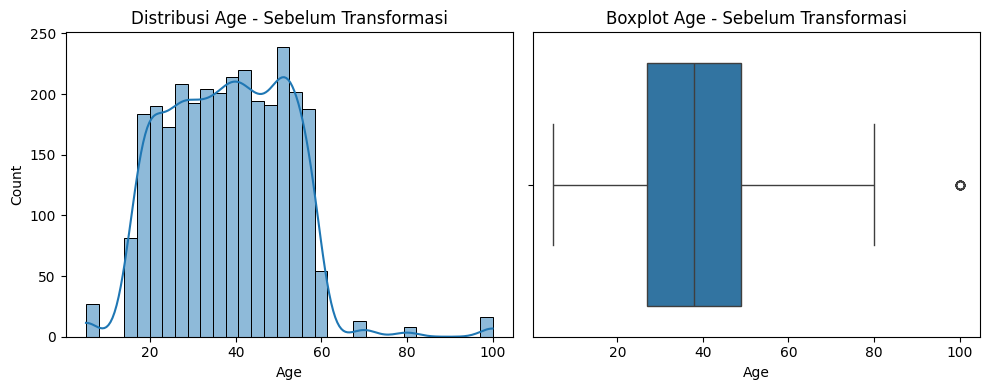

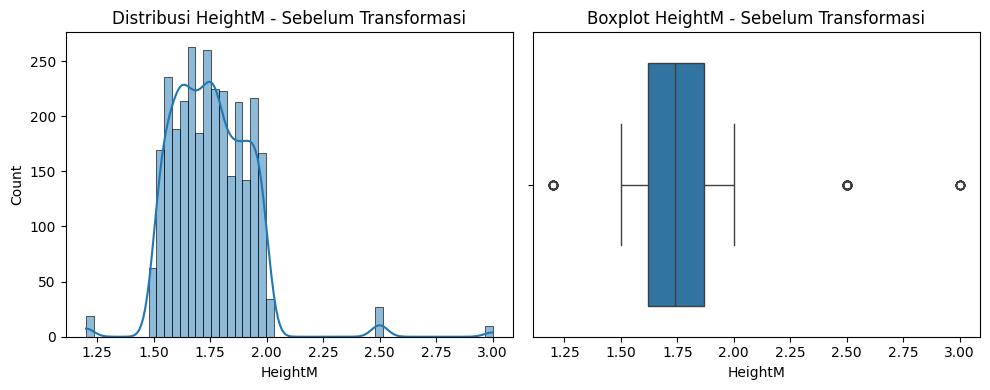

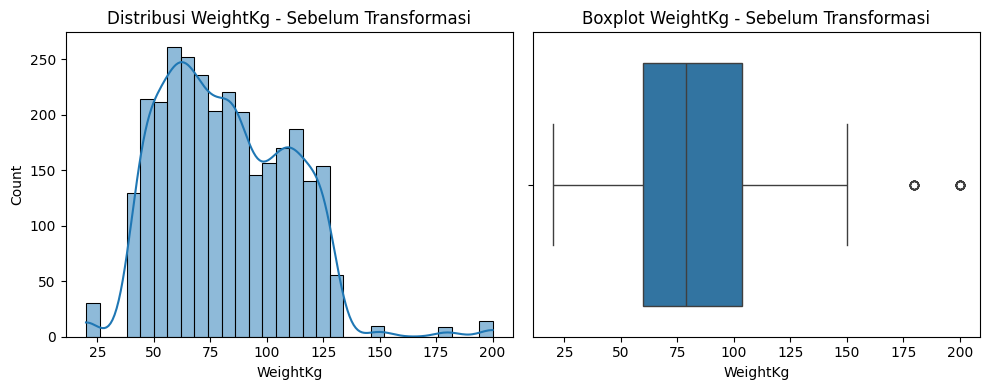

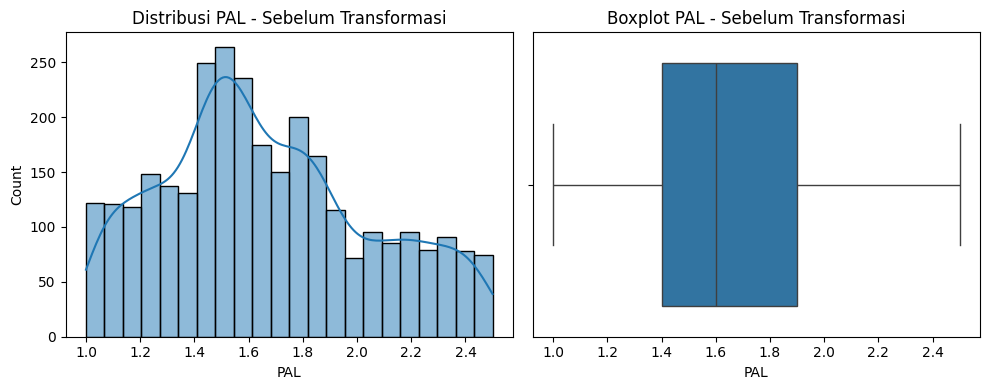

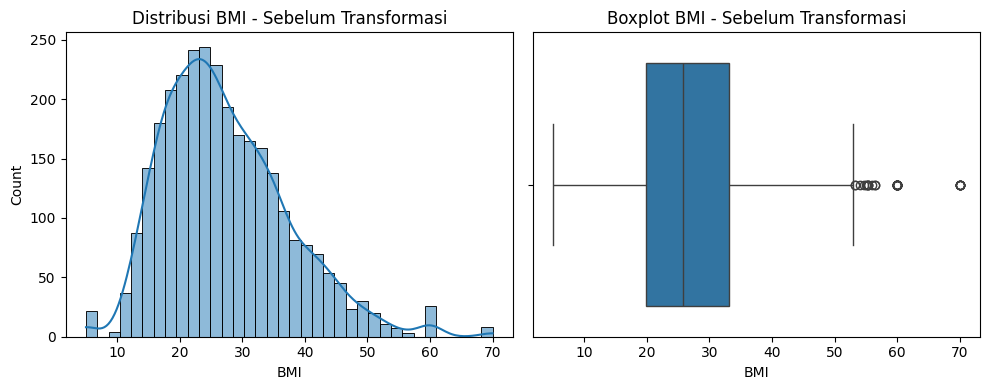

In [11]:
# Univariat - Distribusi dan Boxplot untuk BMI sebelum dan sesudah log transformation
bmi_num_cols = ['Age', 'HeightM', 'WeightKg', 'PAL', 'BMI']
for col in bmi_num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(bmi_df[col], kde=True)
    plt.title(f'Distribusi {col} - Sebelum Transformasi')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=bmi_df[col])
    plt.title(f'Boxplot {col} - Sebelum Transformasi')
    plt.tight_layout()
    plt.show()

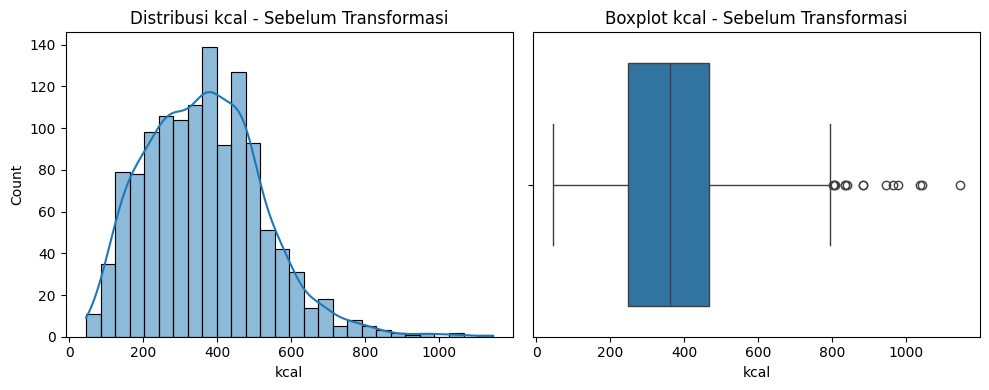

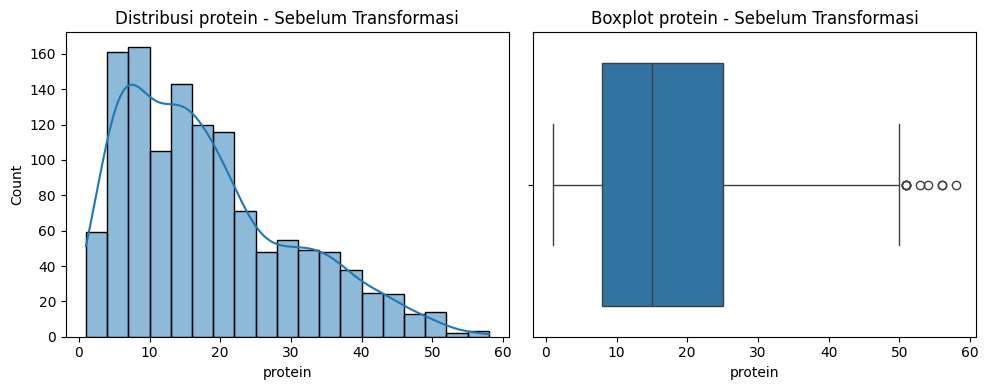

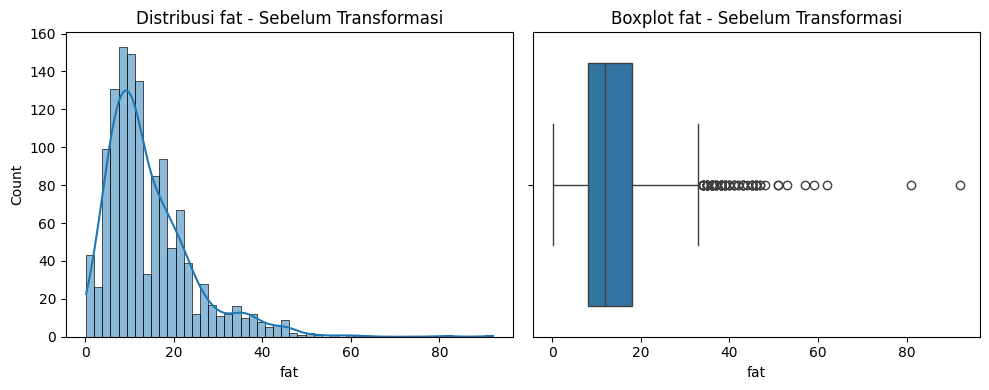

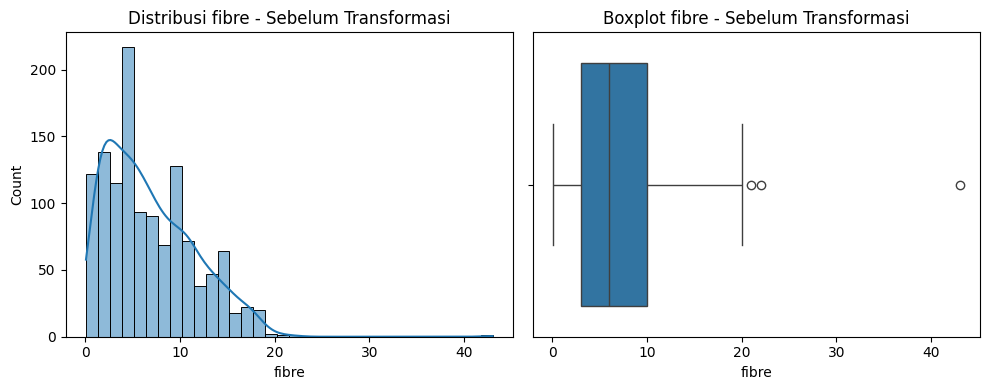

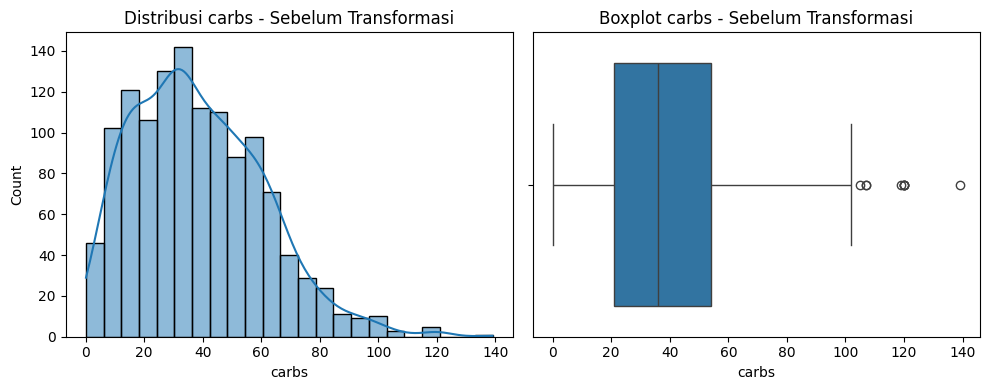

In [12]:
# Univariat - Distribusi dan Boxplot untuk Nutrisi sebelum dan sesudah log transformation
nutri_num_cols = ['kcal', 'protein', 'fat', 'fibre', 'carbs']
for col in nutri_num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(nutri_df[col], kde=True)
    plt.title(f'Distribusi {col} - Sebelum Transformasi')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=nutri_df[col])
    plt.title(f'Boxplot {col} - Sebelum Transformasi')
    plt.tight_layout()
    plt.show()

In [13]:
# Log Transformation untuk mengurangi skewness (untuk data yang miring ke kiri)
bmi_df_log = bmi_df.copy()
nutri_df_log = nutri_df.copy()

# Terapkan log transformation
bmi_df_log['BMI'] = np.log1p(bmi_df_log['BMI'])  # log(x + 1) untuk menghindari log(0)

for col in nutri_num_cols:
    nutri_df_log[col] = np.log1p(nutri_df_log[col])

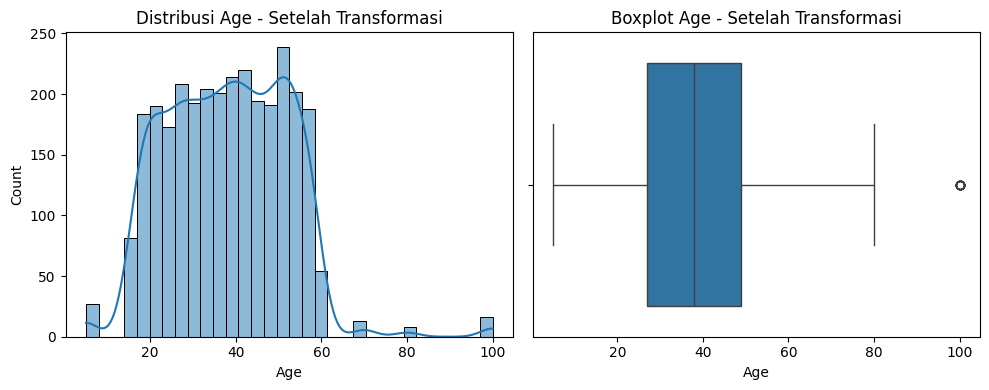

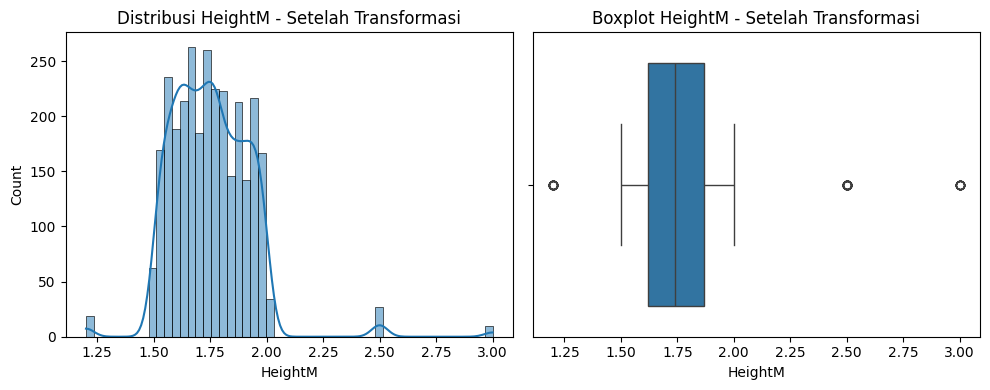

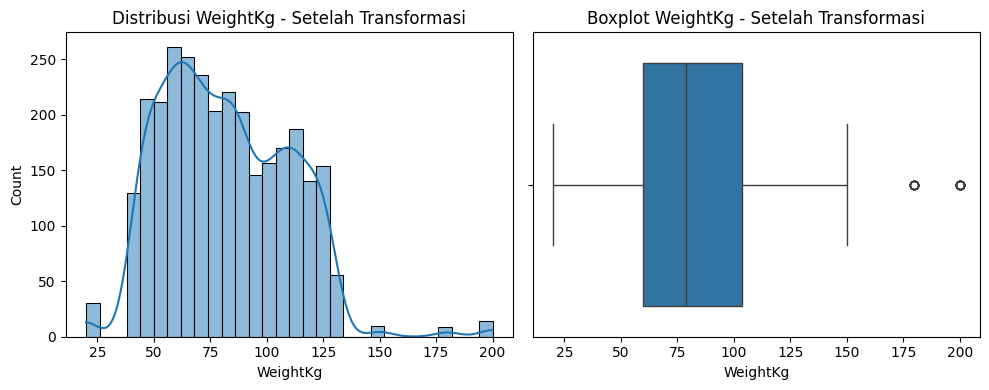

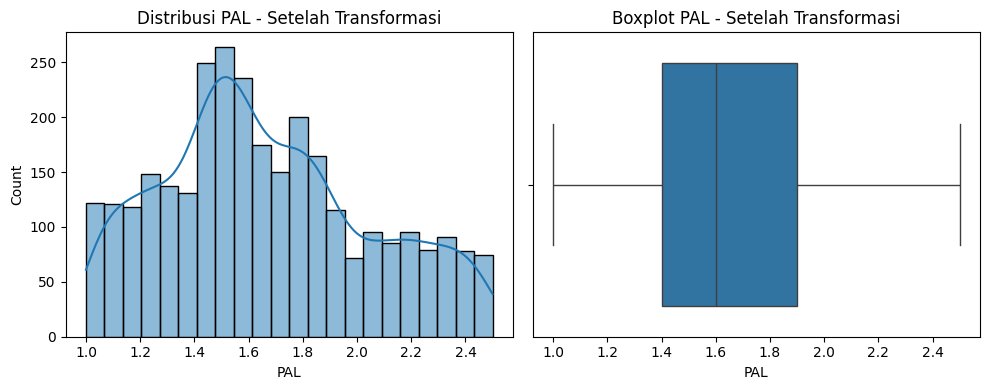

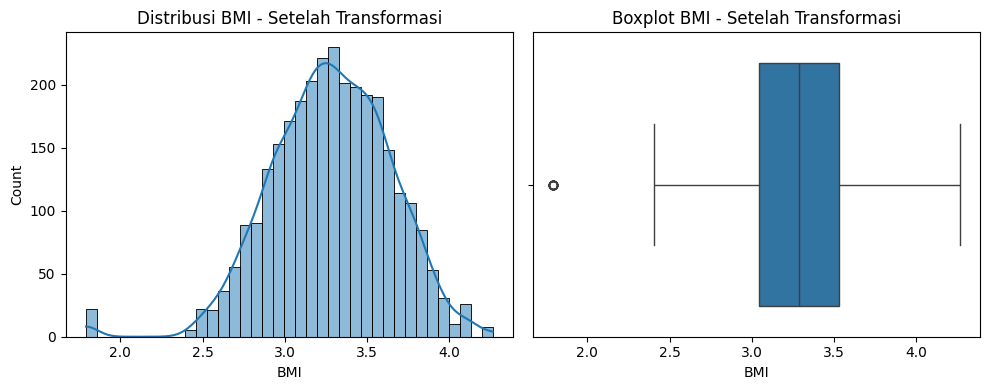

In [14]:
# Univariat - Distribusi dan Boxplot setelah log transformation
for col in bmi_num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(bmi_df_log[col], kde=True)
    plt.title(f'Distribusi {col} - Setelah Transformasi')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=bmi_df_log[col])
    plt.title(f'Boxplot {col} - Setelah Transformasi')
    plt.tight_layout()
    plt.show()

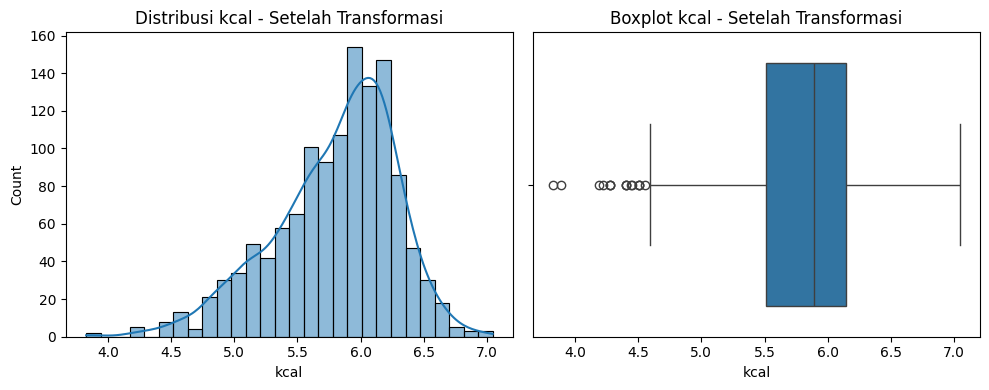

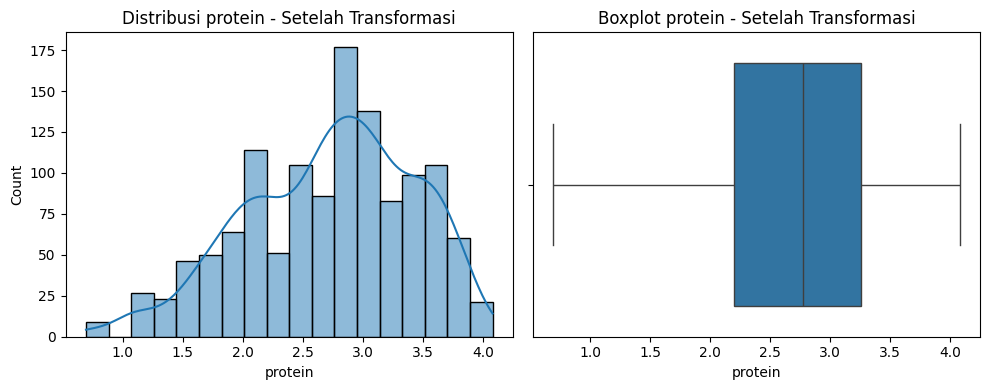

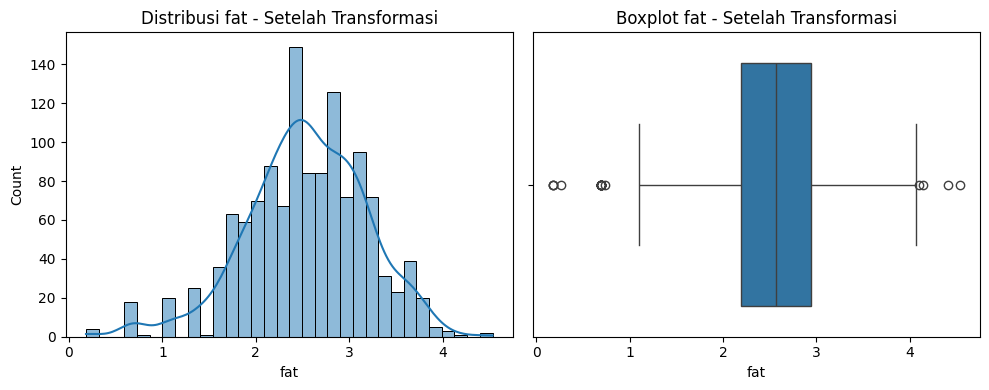

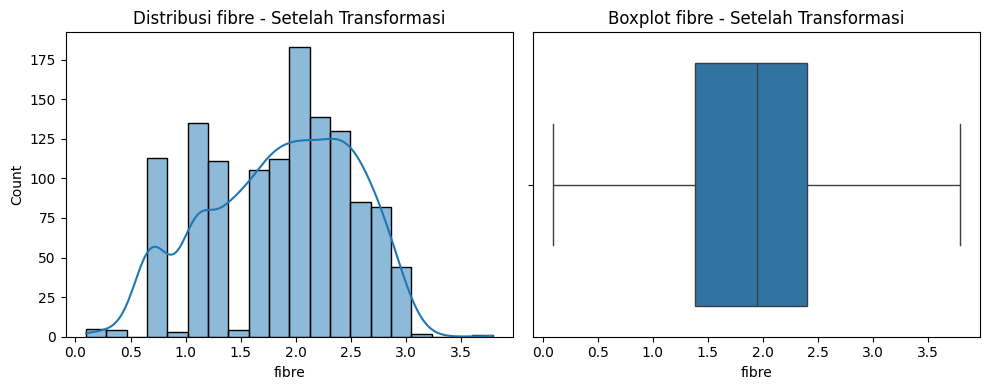

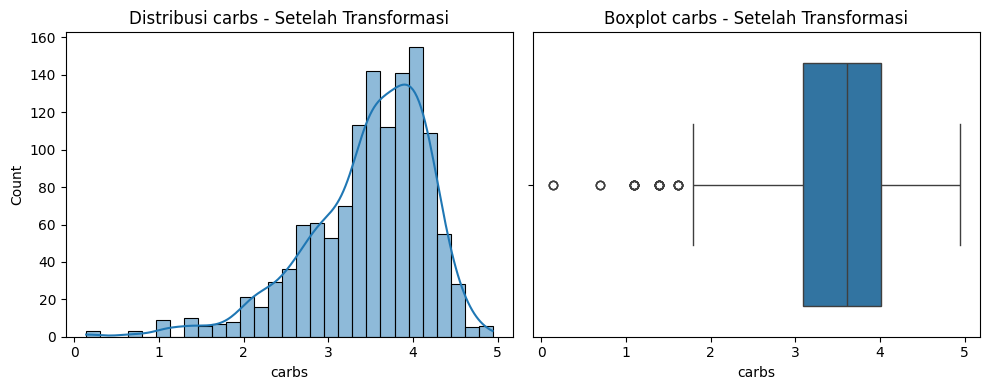

In [15]:
for col in nutri_num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(nutri_df_log[col], kde=True)
    plt.title(f'Distribusi {col} - Setelah Transformasi')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=nutri_df_log[col])
    plt.title(f'Boxplot {col} - Setelah Transformasi')
    plt.tight_layout()
    plt.show()

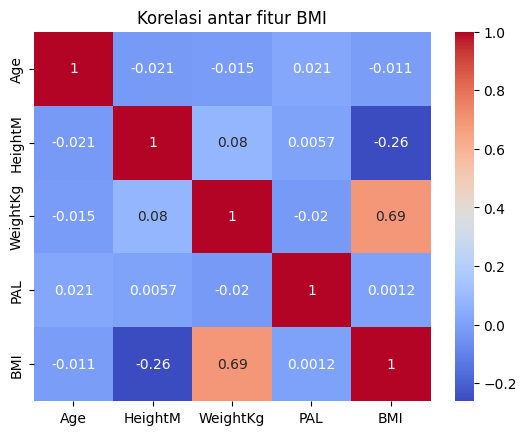

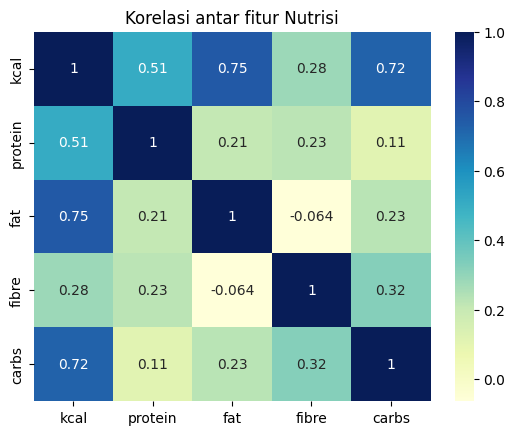

In [16]:
# Bivariat & Korelasi
sns.heatmap(bmi_df[bmi_num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur BMI")
plt.show()

sns.heatmap(nutri_df[nutri_num_cols].corr(), annot=True, cmap='YlGnBu')
plt.title("Korelasi antar fitur Nutrisi")
plt.show()

### Correlation Analysis

In [17]:
# # Korelasi fitur dengan label status gizi (pastikan label numerik jika ingin pakai .corr)
# bmi_df['label_encoded'] = bmi_df['WeightStatus'].map({'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obesitas': 3})
# bmi_corr_with_target = bmi_df[bmi_num_cols + ['label_encoded']].corr()['label_encoded'].sort_values(ascending=False)

# print("Korelasi fitur dengan label status gizi:")
# print(bmi_corr_with_target)

### Data Visualization

### Outlier Detection

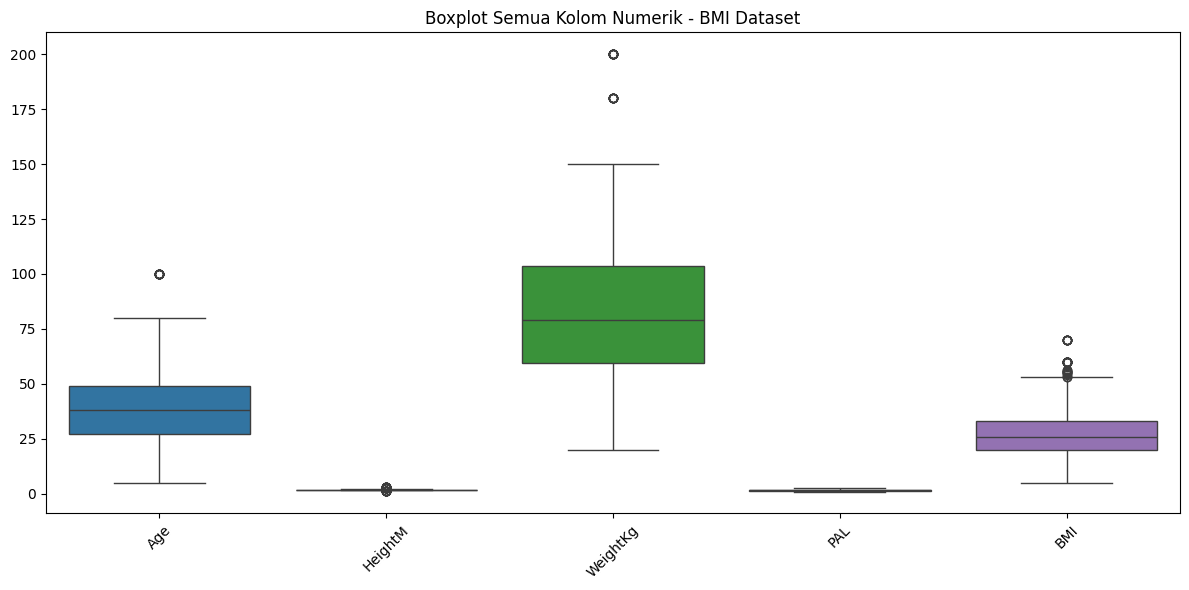

In [18]:
# Boxplot untuk seluruh fitur numerik dataset BMI
plt.figure(figsize=(12, 6))
sns.boxplot(data=bmi_df[bmi_num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Semua Kolom Numerik - BMI Dataset")
plt.tight_layout()
plt.show()

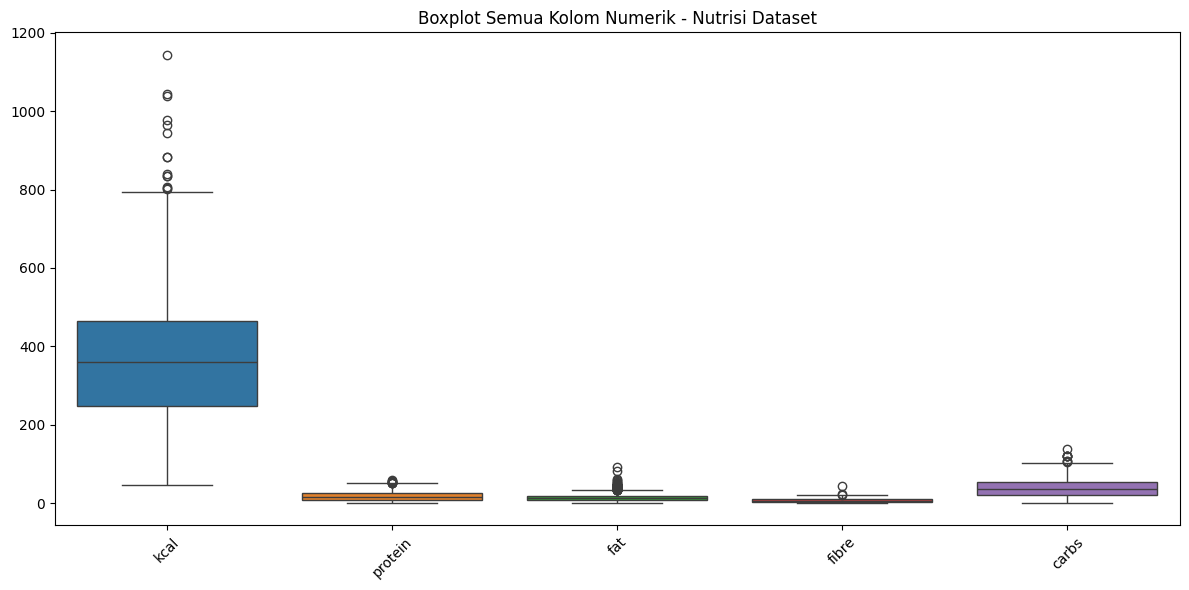

In [19]:
# Boxplot untuk seluruh fitur numerik dataset Nutrisi
plt.figure(figsize=(12, 6))
sns.boxplot(data=nutri_df[nutri_num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Semua Kolom Numerik - Nutrisi Dataset")
plt.tight_layout()
plt.show()

In [20]:
# Deteksi Outlier - Z-score
# Hitung Z-score
# z_bmi = np.abs(stats.zscore(bmi_df[bmi_num_cols]))
z_bmi = np.abs(stats.zscore(bmi_df_log[bmi_num_cols]))

# Cek jumlah outlier sebelum
print("\nOutlier BMI Dataset (sebelum):")
print((z_bmi > 3).sum())

# Hitung Z-score
z_nutri = np.abs(stats.zscore(nutri_df_log[nutri_num_cols]))

# Cek jumlah outlier sebelum
print("\nOutlier Nutrisi Dataset (sebelum):")
print((z_nutri > 3).sum())


Outlier BMI Dataset (sebelum):
Age         24
HeightM     56
WeightKg    23
PAL          0
BMI         22
dtype: int64

Outlier Nutrisi Dataset (sebelum):
kcal        7
protein     0
fat         5
fibre       0
carbs      15
dtype: int64


# Data Preparation

## Data Cleaning

### Handling Outliers

In [21]:
# Handling Outliers - BMI: Remove rows with Z-score > 3 in any numeric column
bmi_df_log = bmi_df_log[(z_bmi < 3).all(axis=1)]

# Hitung ulang Z-score setelah dibersihkan
# z_bmi_after = np.abs(stats.zscore(bmi_df[bmi_num_cols]))
z_bmi_after = np.abs(stats.zscore(bmi_df_log[bmi_num_cols]))

# Cek jumlah outlier setelah
print("\nOutlier BMI Dataset (setelah):")
print((z_bmi_after > 3).sum())

# Handling Outliers - Nutrisi: Remove rows with Z-score > 3 in any column
nutri_df_log = nutri_df_log[(z_nutri < 3).all(axis=1)]

# Hitung ulang Z-score setelah dibersihkan
# z_nutri_after = np.abs(stats.zscore(nutri_df[nutri_num_cols]))
z_nutri_after = np.abs(stats.zscore(nutri_df_log[nutri_num_cols]))

# Cek jumlah outlier setelah
print("\nOutlier Nutrisi Dataset (setelah):")
print((z_nutri_after > 3).sum())


Outlier BMI Dataset (setelah):
Age         0
HeightM     0
WeightKg    0
PAL         0
BMI         0
dtype: int64

Outlier Nutrisi Dataset (setelah):
kcal       2
protein    0
fat        0
fibre      0
carbs      9
dtype: int64


In [22]:
# Pembersihan Outlier dengan IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return df

In [23]:
# Hapus outlier dengan IQR
bmi_df_iqr = remove_outliers_iqr(bmi_df_log, bmi_num_cols)
nutri_df_iqr = remove_outliers_iqr(nutri_df_log, nutri_num_cols)

# Cek jumlah outlier setelah IQR
z_bmi_iqr = np.abs(stats.zscore(bmi_df_iqr[bmi_num_cols]))
print("\nOutlier BMI Dataset setelah IQR:")
print((z_bmi_iqr > 3).sum())

z_nutri_iqr = np.abs(stats.zscore(nutri_df_iqr[nutri_num_cols]))
print("\nOutlier Nutrisi Dataset setelah IQR:")
print((z_nutri_iqr > 3).sum())


Outlier BMI Dataset setelah IQR:
Age         0
HeightM     0
WeightKg    0
PAL         0
BMI         0
dtype: int64

Outlier Nutrisi Dataset setelah IQR:
kcal       0
protein    4
fat        0
fibre      0
carbs      0
dtype: int64


## Encoding Categorical Data

In [24]:
# Encoding kolom Gender
le = LabelEncoder()
bmi_df.loc[:, 'Gender'] = le.fit_transform(bmi_df['Gender'])  # Laki-laki:1, Perempuan:0

pal_order = {
    'Sedentary': 0,
    'Low Active': 1,
    'Active': 2,
    'Very Active': 3
}
bmi_df['PAL_LevelEncoded'] = bmi_df['PAL_kategori'].map(pal_order)

## Feature Engineering & Selection

In [25]:
if 'BMI' not in bmi_df.columns:
    bmi_df['BMI'] = bmi_df['WeightKg'] / (bmi_df['HeightM'] ** 2)

def klasifikasi_bmi(bmi):
    if bmi < 18.5: return 'Underweight'
    elif bmi < 25: return 'Normal'
    elif bmi < 30: return 'Overweight'
    else: return 'Obesity'

bmi_df['WeightStatus'] = bmi_df['BMI'].apply(klasifikasi_bmi)
bmi_df['WeightStatusEncoded'] = le.fit_transform(bmi_df['WeightStatus'])

In [26]:
# Korelasi fitur dengan label status gizi (pastikan label numerik jika ingin pakai .corr)
bmi_df['label_encoded'] = bmi_df['WeightStatus'].map({'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obesity': 3})
bmi_corr_with_target = bmi_df[bmi_num_cols + ['label_encoded']].corr()['label_encoded'].sort_values(ascending=False)

print("Korelasi fitur dengan label status gizi:")
print(bmi_corr_with_target)

Korelasi fitur dengan label status gizi:
label_encoded    1.000000
BMI              0.876474
WeightKg         0.738739
Age             -0.001214
PAL             -0.019440
HeightM         -0.203969
Name: label_encoded, dtype: float64


In [27]:
def extract_menu_name(filename):
    """
    Ekstrak nama menu bersih dari filename:
    1) Buang ekstensi (.jpg/.jpeg/.png)
    2) Hapus segmen terakhir (setelah hyphen terakhir) — biasanya hash atau angka acak
    3) Hapus semua angka yang tersisa
    4) Ganti '-' dan '_' menjadi spasi; rapikan spasi ganda
    """
    # Abaikan file generik
    if filename.startswith("recipe-image-legacy-id"):
        return None

    # 1) Hapus ekstensi gambar
    name = re.sub(r'\.(jpe?g|png)$', '', filename, flags=re.IGNORECASE)

    # 2) Hapus segmen terakhir (setelah hyphen terakhir)
    #    Contoh: "cod-cucumber-avocado-mango-salsa-salad-517846e" -> "cod-cucumber-avocado-mango-salsa-salad"
    name = re.sub(r'-[^-]+$', '', name)

    # 3) Hapus semua digit yang tersisa di seluruh string
    name = re.sub(r'\d+', '', name)

    # 4) Ganti '-' dan '_' menjadi spasi
    name = name.replace('-', ' ').replace('_', ' ')

    # Rapikan spasi ganda dan trim
    name = re.sub(r'\s+', ' ', name).strip()

    return name

nutri_df['Menu'] = nutri_df['image'].apply(extract_menu_name)
nutri_df.dropna(subset=['Menu'], inplace=True)
nutri_df.drop_duplicates(subset=['Menu'], inplace=True)
print(nutri_df[['Menu', 'image']].head(10))

# Siapkan data rekomendasi (copy dari nutri_df dan pastikan kolom Menu sudah ada)
rekomendasi_df = nutri_df.copy()

                                  Menu  \
12                         bread thins   
13                         pitta bread   
14            piri piri chicken pittas   
27        frozen tropical fruit yogurt   
37                     butternut tarte   
82  Prawn pepper and chickpea filo pie   
83           sausage apple sage roll a   
84                          samosa pie   
85                                tart   
89                       shepherds pie   

                                             image  
12                         bread-thins-8a75e8f.jpg  
13                         pitta-bread-74a1b32.jpg  
14            piri-piri-chicken-pittas-3baabcf.jpg  
27        frozen-tropical-fruit-yogurt-0080ef3.jpg  
37                     butternut-tarte-f662d6e.jpg  
82  Prawn-pepper-and-chickpea-filo-pie-4f37a9b.jpg  
83      sausage-apple-sage-roll-6949a31-scaled.jpg  
84                          samosa-pie-f865c5a.jpg  
85                                tart-f0b44a1.jpg  
89     

In [28]:
# nutri_df.head(500)

## Normalization or Standardization

In [29]:
# kombinasi 1
fitur_awal = ['Gender', 'Age', 'HeightM', 'WeightKg']  # Bisa kamu ubah-ubah
# X = bmi_df[fitur_awal]

# kombinasi 2
# fitur_awal = ['Gender', 'Age', 'HeightM', 'WeightKg', 'BMI']
# X = bmi_df[fitur_awal]

# kombinasi 3
# fitur_awal = ['Gender', 'Age', 'HeightM', 'WeightKg', 'WH_Ratio']
X = bmi_df[fitur_awal]
y = bmi_df['WeightStatus']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Fitur Terpilih dari SelectKBest: ['Gender', 'Age', 'HeightM', 'WeightKg']

Nilai Feature Importance (Random Forest):
   Fitur  Importance
WeightKg    0.695441
 HeightM    0.230140
     Age    0.063704
  Gender    0.010715


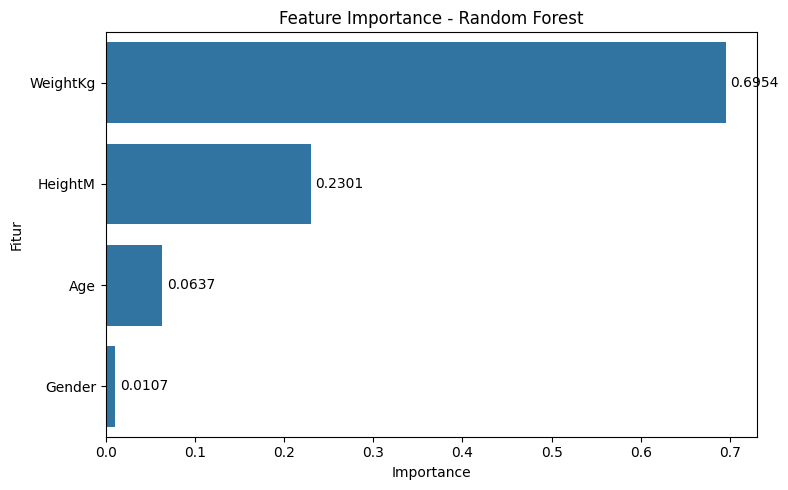

In [30]:
# Tambahkan fitur tambahan secara manual
fitur_tambahan = ['PAL']
fitur_tambahan_df = bmi_df[fitur_tambahan]

# 3. Gabungkan X dengan fitur tambahan (otomatis aman)
X_full = pd.concat([X.reset_index(drop=True),
                    fitur_tambahan_df.reset_index(drop=True)], axis=1)

# # print(X_full.isna().sum())

# # Lakukan scaling ulang pada X_full
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Seleksi fitur terbaik menggunakan SelectKBest
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X_full_scaled, y)
# X_selected = selector.fit_transform(X, y)
selected_features = selector.get_support(indices=True)
selected_feature_names = X_full.columns[selected_features]
# selected_feature_names = X.columns[selected_features]
print("\nFitur Terpilih dari SelectKBest:", list(selected_feature_names))

# Update X agar hanya menggunakan fitur yang dipilih
X = X_full[selected_feature_names]
# X = X[selected_feature_names]

# Analisis feature importance (khusus Random Forest)
model_temp = RandomForestClassifier(random_state=42)
model_temp.fit(X, y)
importances = model_temp.feature_importances_
feat_importance_df = pd.DataFrame({'Fitur': X.columns, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Urutkan dari yang paling penting
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Cetak angka pastinya
print("\nNilai Feature Importance (Random Forest):")
print(feat_importance_df.to_string(index=False))

# Visualisasi feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Fitur', data=feat_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Fitur')

# Tambahkan angka importance di ujung bar chart
for i, (imp, fitur) in enumerate(zip(feat_importance_df['Importance'], feat_importance_df['Fitur'])):
    plt.text(imp + 0.005, i, f"{imp:.4f}", va='center')  # angka 4 digit desimal

plt.tight_layout()
plt.show()

## Split Data (Train-Test)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data
print(f"Total data      : {len(X_scaled)}")
print(f"Data latih (80%): {len(X_train)}")
print(f"Data uji  (20%) : {len(X_test)}")

Total data      : 3000
Data latih (80%): 2400
Data uji  (20%) : 600


# Modeling

## Model Development dengan Random Forest

### Model Training

In [32]:
# Training model Random Forest tanpa tuning
rf_basic = RandomForestClassifier(random_state=42)
rf_basic.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
# Evaluasi akurasi model tanpa tuning
rf_basic_acc = accuracy_score(y_test, rf_basic.predict(X_test))
print("\n🔍 Akurasi Model Tanpa Tuning:")
print(f"Random Forest: {rf_basic_acc:.4f}")


🔍 Akurasi Model Tanpa Tuning:
Random Forest: 0.9283


### Parameter Tuning (GridSearchCV, RandomizedSearchCV)

In [34]:
print("\n🔍 Tuning Random Forest ...")
rf_params = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=rf_params, n_iter=30, cv=10, random_state=42, n_jobs=-1, verbose=1)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_


🔍 Tuning Random Forest ...
Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [35]:
# GridSearchCV - Random Forest
# print("\n🔍 Tuning Random Forest ...")
# rf_params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }
# rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=10, n_jobs=-1, verbose=1)
# rf_grid.fit(X_train, y_train)
# best_rf = rf_grid.best_estimator_

In [36]:
# Evaluasi akurasi model hasil tuning
rf_tuned_acc = accuracy_score(y_test, best_rf.predict(X_test))
print("\n✅ Akurasi Model Setelah Tuning:")
print(f"Random Forest: {rf_tuned_acc:.4f}")


✅ Akurasi Model Setelah Tuning:
Random Forest: 0.9317


## Model Development dengan Content Based Filtering

In [37]:
# # Tambahkan kolom kelompok usia untuk segmentasi demografi
# bmi_df['AgeGroup'] = pd.cut(bmi_df['Age'], bins=[0, 18, 30, 45, 60, 100],
#                              labels=['Remaja', 'Dewasa Muda', 'Dewasa', 'Paruh Baya', 'Lansia'])

# # Hitung profil nutrisi rata-rata berdasarkan demografi (Gender + AgeGroup)
# demographic_profile = bmi_df.groupby(['Gender', 'AgeGroup'], observed=False).agg({
#     'Calories_Burned': 'mean',
#     'Fat_Percentage': 'mean',
#     'Water_Intake (liters)': 'mean',
#     'BMI': 'mean'
# }).reset_index()

### Filtering - Scoring - Sorting

In [38]:
# # Fungsi sistem rekomendasi berbasis demografi

# def rekomendasi_demografi(gender, age, top_n=20):
#     # ---------------------------
#     # TAHAP 1: FILTERING
#     # ---------------------------
#    # Prediksi status gizi berdasarkan input user
#     input_scaled = scaler.transform([input_data])
#     pred_status = model.predict(input_scaled)[0]

#     # Filter menu berdasarkan status gizi
#     if pred_status == "Underweight":
#         filtered = nutri_df[nutri_df['kcal'] > 300]
#     elif pred_status == "Normal":
#         filtered = nutri_df[(nutri_df['kcal'] >= 200) & (nutri_df['kcal'] <= 400)]
#     elif pred_status == "Overweight":
#         filtered = nutri_df[nutri_df['kcal'] <= 300]
#     else:  # Obesity
#         filtered = nutri_df[nutri_df['kcal'] <= 250]

#     # ---------------------------
#     # TAHAP 2: SCORING
#     # ---------------------------
#     # Tambahkan skor berdasarkan kandungan protein (semakin tinggi semakin baik)
#     filtered = filtered.copy()
#     filtered['score'] = filtered['protein']

#     # ---------------------------
#     # TAHAP 3: SORTING
#     # ---------------------------
#     # Urutkan berdasarkan skor tertinggi (paling sesuai kebutuhan)
#     hasil = filtered.sort_values(by='score', ascending=False)

#     # Hapus duplikat menu berdasarkan nama
#     hasil = hasil.drop_duplicates(subset=['Menu'])

#     # Tampilkan menu hasil rekomendasi
#     return hasil[['Menu', 'image', 'kcal', 'protein', 'fat', 'fibre', 'carbs']].head(top_n)

# # Contoh pemanggilan
# print("\n🍽 Rekomendasi Berdasarkan Demografi:")
# rekom_demo = rekomendasi_demografi(gender=1, age=25)
# print(rekom_demo)

# Evaluation

In [39]:
# Evaluasi Random Forest
rf_preds = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("\n=== Evaluasi Random Forest ===")
print(f"Akurasi: {rf_acc:.4f}")
print(classification_report(y_test, rf_preds))


=== Evaluasi Random Forest ===
Akurasi: 0.9317
              precision    recall  f1-score   support

      Normal       0.93      0.95      0.94       165
     Obesity       0.97      0.93      0.95       209
  Overweight       0.88      0.90      0.89       119
 Underweight       0.93      0.94      0.94       107

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



Text(120.72222222222221, 0.5, 'Aktual')

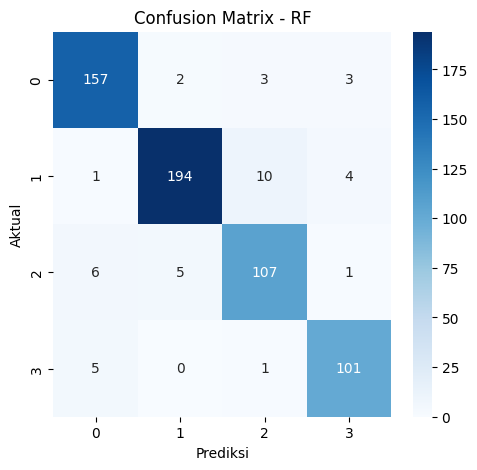

In [40]:
# Visualisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RF")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

## Validation (Cross-Validation)

In [41]:
# Cross-Validation Akurasi
rf_cv = cross_val_score(best_rf, X_scaled, y, cv=10)
print("\nRandom Forest 10-Fold CV Akurasi:", np.mean(rf_cv))


Random Forest 10-Fold CV Akurasi: 0.9259999999999999


In [42]:
# Deteksi Overfitting / Underfitting
rf_train_acc = best_rf.score(X_train, y_train)
rf_test_acc = best_rf.score(X_test, y_test)
print("\n[Random Forest] Train Accuracy:", rf_train_acc)
print("[Random Forest] Test Accuracy:", rf_test_acc)
if abs(rf_train_acc - rf_test_acc) > 0.1:
    if rf_train_acc > rf_test_acc:
        print("Model Random Forest kemungkinan mengalami overfitting.")
    else:
        print("Model Random Forest kemungkinan underfitting.")
else:
    print("Model Random Forest konsisten.")


[Random Forest] Train Accuracy: 0.9904166666666666
[Random Forest] Test Accuracy: 0.9316666666666666
Model Random Forest konsisten.


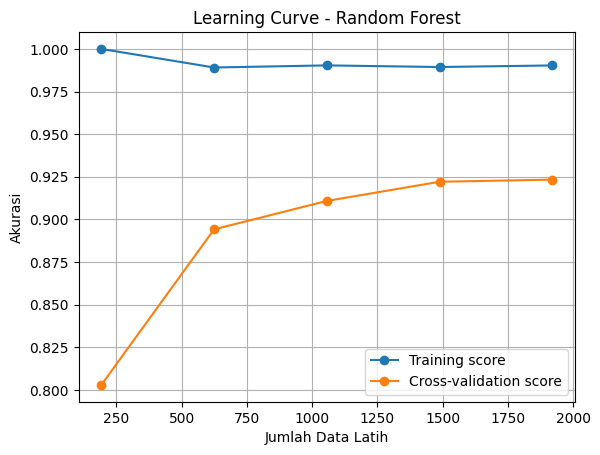

In [43]:
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Jumlah Data Latih")
    plt.ylabel("Akurasi")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves
plot_learning_curve(best_rf, "Learning Curve - Random Forest", X_train, y_train)

In [44]:
joblib.dump(best_rf, 'Models/random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

# Save scaler
joblib.dump(scaler, 'Models/scaler.pkl')
print("Imputer and Scaler saved as 'scaler.pkl'")

# Save label encoder
joblib.dump(le, 'Models/label_encoder.pkl')
print("Label Encoder saved as 'label_encoder.pkl'")

Model saved as 'random_forest_model.pkl'
Imputer and Scaler saved as 'scaler.pkl'
Label Encoder saved as 'label_encoder.pkl'


## Recommended Food Menu

In [45]:
def rekomendasi_nutrisi(status_prediksi, top_n=10):
    if status_prediksi == "Underweight":
        filtered = nutri_df.sort_values(by=['kcal', 'protein'], ascending=False)
    elif status_prediksi == "Overweight":
        filtered = nutri_df.sort_values(by=['kcal', 'fat', 'sugars'], ascending=True)
    elif status_prediksi == "Obesity":
        filtered = nutri_df.sort_values(by=['kcal', 'fat', 'saturates'], ascending=True)
        filtered = filtered[filtered['fibre'] > 2]
    else:
        filtered = nutri_df.sample(frac=1)

    filtered_unique = filtered.drop_duplicates(subset=['Menu'], keep='first')
    return filtered_unique[['Menu', 'image', 'kcal', 'protein', 'fat', 'fibre', 'carbs']].head(top_n)

In [46]:
# Prediksi status user dari data baru
user_input_df = pd.DataFrame([{
    'Gender': 1,
    'Age': 21,
    'HeightM': 1.73,
    'WeightKg': 50,
    # 'PAL_LevelEncoded': pal_order['Low Active']
}])


user_scaled = scaler.transform(user_input_df)
status_user = best_rf.predict(user_scaled)[0]
print(f"\nStatus prediksi user baru: {status_user}")
print(f"Akurasi prediksi pada user baru: {best_rf.score(user_scaled, [status_user]) * 100:.2f}%")

print("\n🍽 Rekomendasi Menu:")
print(rekomendasi_nutrisi(status_user))


Status prediksi user baru: Underweight
Akurasi prediksi pada user baru: 100.00%

🍽 Rekomendasi Menu:
                                         Menu  \
112                            Fudgy brownies   
1083                        Pea and ham pasta   
1024  Creamy leek cheddar and potato fish pie   
947                            Halloumi wraps   
216                        Sausage pasta bake   
691   Creamy Baked Gnocchi Spinach and Squash   
474                            Salmon risotto   
1147                    Oven Baked Pork Chops   
493                          curied tofu wrap   
1197                             Mac n cheese   

                                                  image    kcal  protein  \
112                         Fudgy-brownies--daa8eb5.jpg  1043.0     14.0   
1083                      Pea-and-ham-pasta-3af5250.jpg  1038.0     37.0   
1024  Creamy-leek-cheddar-and-potato-fish-pie-a65c63...   964.0     34.0   
947                          Halloumi-wraps-4d13065.jp

# Deployment